In [59]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [60]:
df = pd.read_excel("Dataset_updated.xlsx")

In [61]:
df.isna().sum()

patient_id                   0
insurance_with_us            0
regular_checkup              0
adventure_sports             0
occupation                   0
visited_doctors              0
cholesterol                  0
daily_steps                  0
age                          0
heart_disease_history        0
other_major_disease          0
gender                       0
glucose_level                0
bmi                        990
smoking_status               0
last_admitted            11881
location                     0
weight                       0
insurance_company            0
alcohol_consumption          0
exercise_regimen             0
weight_change                0
fat_percentage               0
insurance_cost               0
dtype: int64

In [62]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['bmi']] = imputer1.fit_transform(df[['bmi']])

imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['last_admitted']] = imputer2.fit_transform(df[['last_admitted']])

In [63]:
df.isna().sum()

patient_id               0
insurance_with_us        0
regular_checkup          0
adventure_sports         0
occupation               0
visited_doctors          0
cholesterol              0
daily_steps              0
age                      0
heart_disease_history    0
other_major_disease      0
gender                   0
glucose_level            0
bmi                      0
smoking_status           0
last_admitted            0
location                 0
weight                   0
insurance_company        0
alcohol_consumption      0
exercise_regimen         0
weight_change            0
fat_percentage           0
insurance_cost           0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             25000 non-null  int64  
 1   insurance_with_us      25000 non-null  int64  
 2   regular_checkup        25000 non-null  int64  
 3   adventure_sports       25000 non-null  int64  
 4   occupation             25000 non-null  object 
 5   visited_doctors        25000 non-null  int64  
 6   cholesterol            25000 non-null  object 
 7   daily_steps            25000 non-null  int64  
 8   age                    25000 non-null  int64  
 9   heart_disease_history  25000 non-null  int64  
 10  other_major_disease    25000 non-null  int64  
 11  gender                 25000 non-null  object 
 12  glucose_level          25000 non-null  int64  
 13  bmi                    25000 non-null  float64
 14  smoking_status         25000 non-null  object 
 15  la

In [65]:
df.head(10)

,patient_id,insurance_with_us,regular_checkup,adventure_sports,occupation,visited_doctors,cholesterol,daily_steps,age,heart_disease_history,...,smoking_status,last_admitted,location,weight,insurance_company,alcohol_consumption,exercise_regimen,weight_change,fat_percentage,insurance_cost
0,117693,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,2010.0,Chennai,67,N,Rare,Moderate,1,25,20978
1,33139,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,2010.0,Jaipur,58,N,Rare,Moderate,3,27,6170
2,198703,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,2010.0,Jaipur,73,N,Daily,Extreme,0,32,28382
3,116554,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,2010.0,Chennai,71,Y,Rare,No,3,37,27148
4,60943,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616
5,122344,8,0,0,Salried,2,225 to 250,5306,39,0,...,Unknown,2003.0,Bhubaneswar,78,Y,Rare,No,3,13,39488
6,89812,8,0,0,Student,4,125 to 150,4676,40,0,...,never smoked,2004.0,Guwahati,81,N,No,Moderate,3,16,37020
7,130295,1,0,0,Student,4,150 to 175,7448,46,0,...,smokes,2010.0,Chennai,72,N,Rare,Moderate,0,34,29616
8,124433,8,1,0,Salried,4,125 to 150,5632,45,0,...,smokes,2007.0,Mumbai,67,Y,Rare,No,1,12,22212
9,211523,4,3,0,Salried,3,125 to 150,4130,38,0,...,formerly smoked,2010.0,Nagpur,63,N,Daily,Moderate,0,12,8638


In [66]:
df = df.drop('patient_id',axis=1)
encoder = LabelEncoder()

category = ['occupation','heart_disease_history','insurance_company','alcohol_consumption','exercise_regimen','location','smoking_status','gender']

for i in category:
  df[i] = encoder.fit_transform(df[i])

In [67]:
def value(feature):
    value , _ = map(int, feature.split(' to '))
    return value

df['cholesterol'] = df['cholesterol'].apply(value)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   insurance_with_us      25000 non-null  int64  
 1   regular_checkup        25000 non-null  int64  
 2   adventure_sports       25000 non-null  int64  
 3   occupation             25000 non-null  int32  
 4   visited_doctors        25000 non-null  int64  
 5   cholesterol            25000 non-null  int64  
 6   daily_steps            25000 non-null  int64  
 7   age                    25000 non-null  int64  
 8   heart_disease_history  25000 non-null  int64  
 9   other_major_disease    25000 non-null  int64  
 10  gender                 25000 non-null  int32  
 11  glucose_level          25000 non-null  int64  
 12  bmi                    25000 non-null  float64
 13  smoking_status         25000 non-null  int32  
 14  last_admitted          25000 non-null  float64
 15  lo

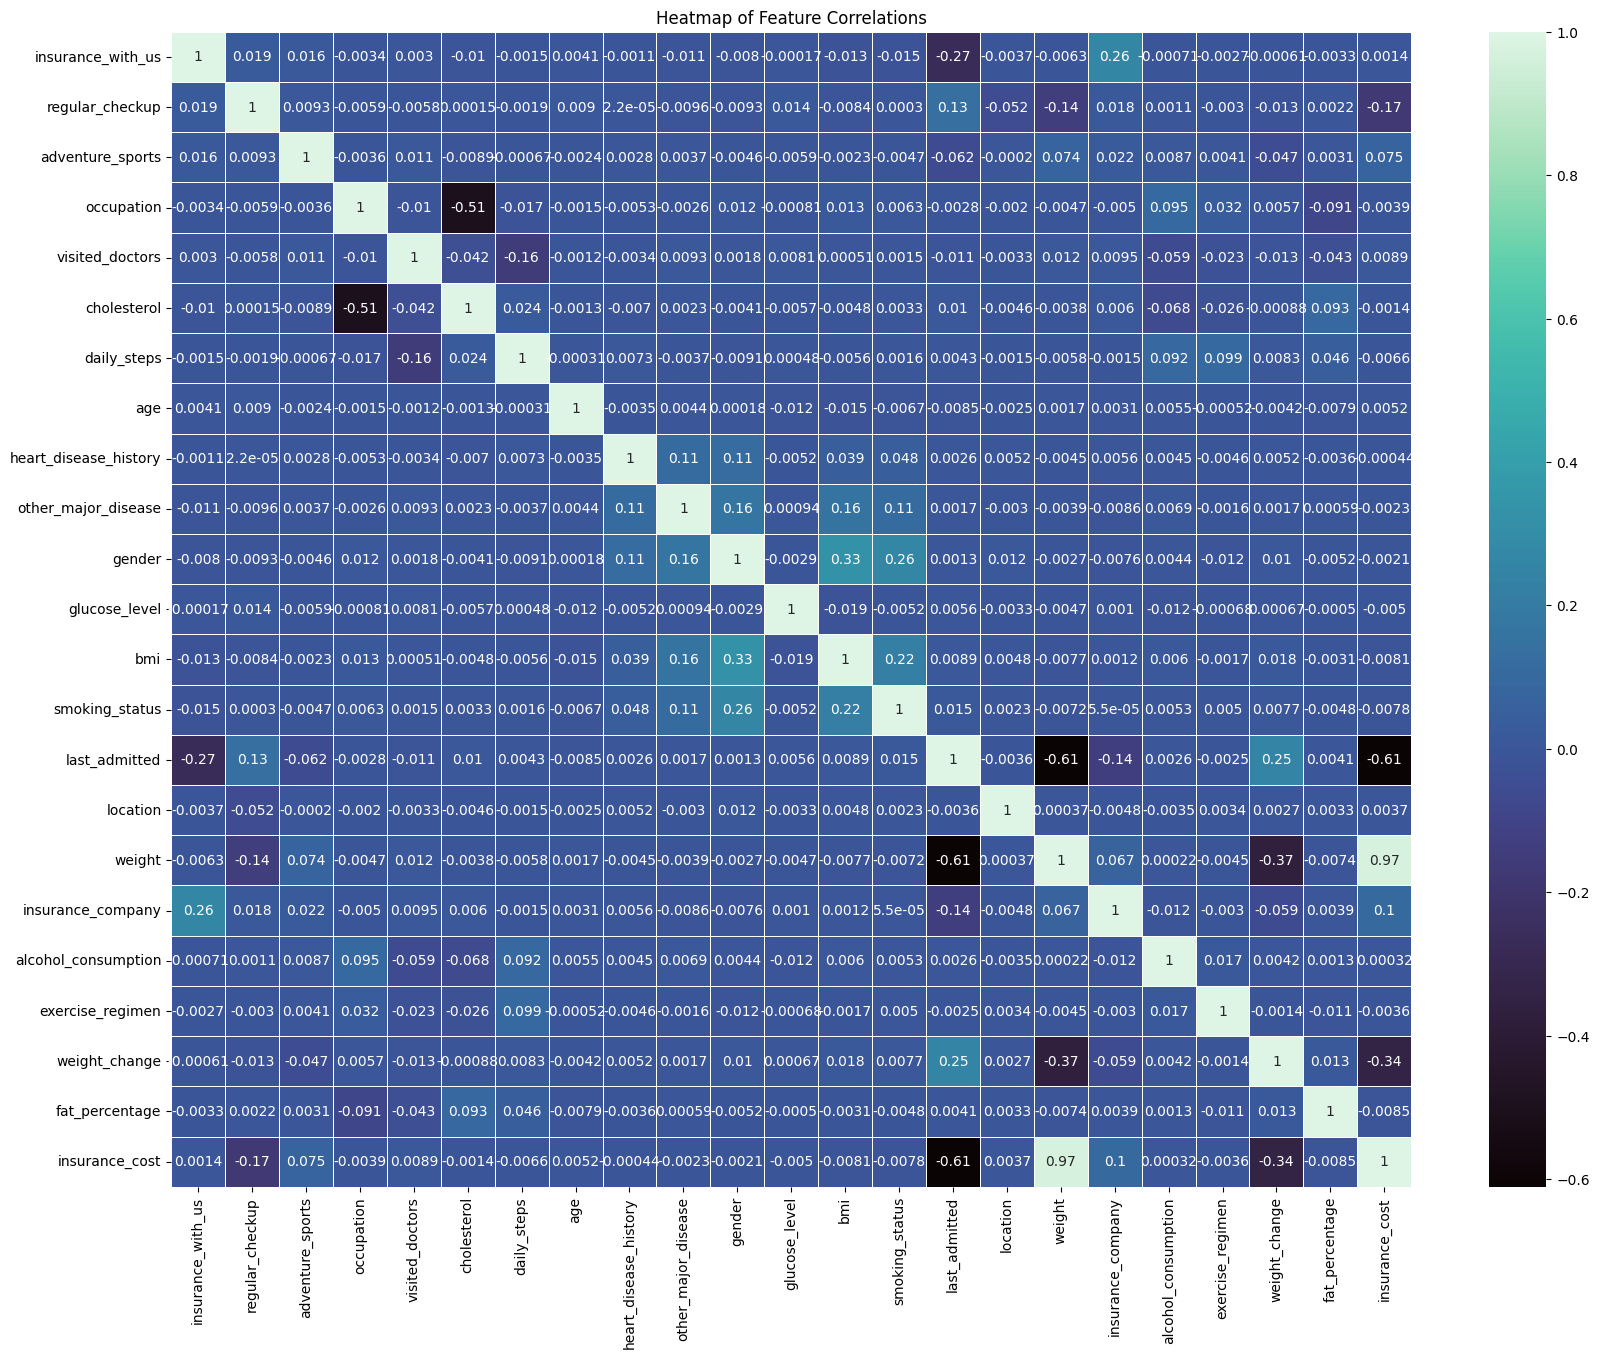

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='mako', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

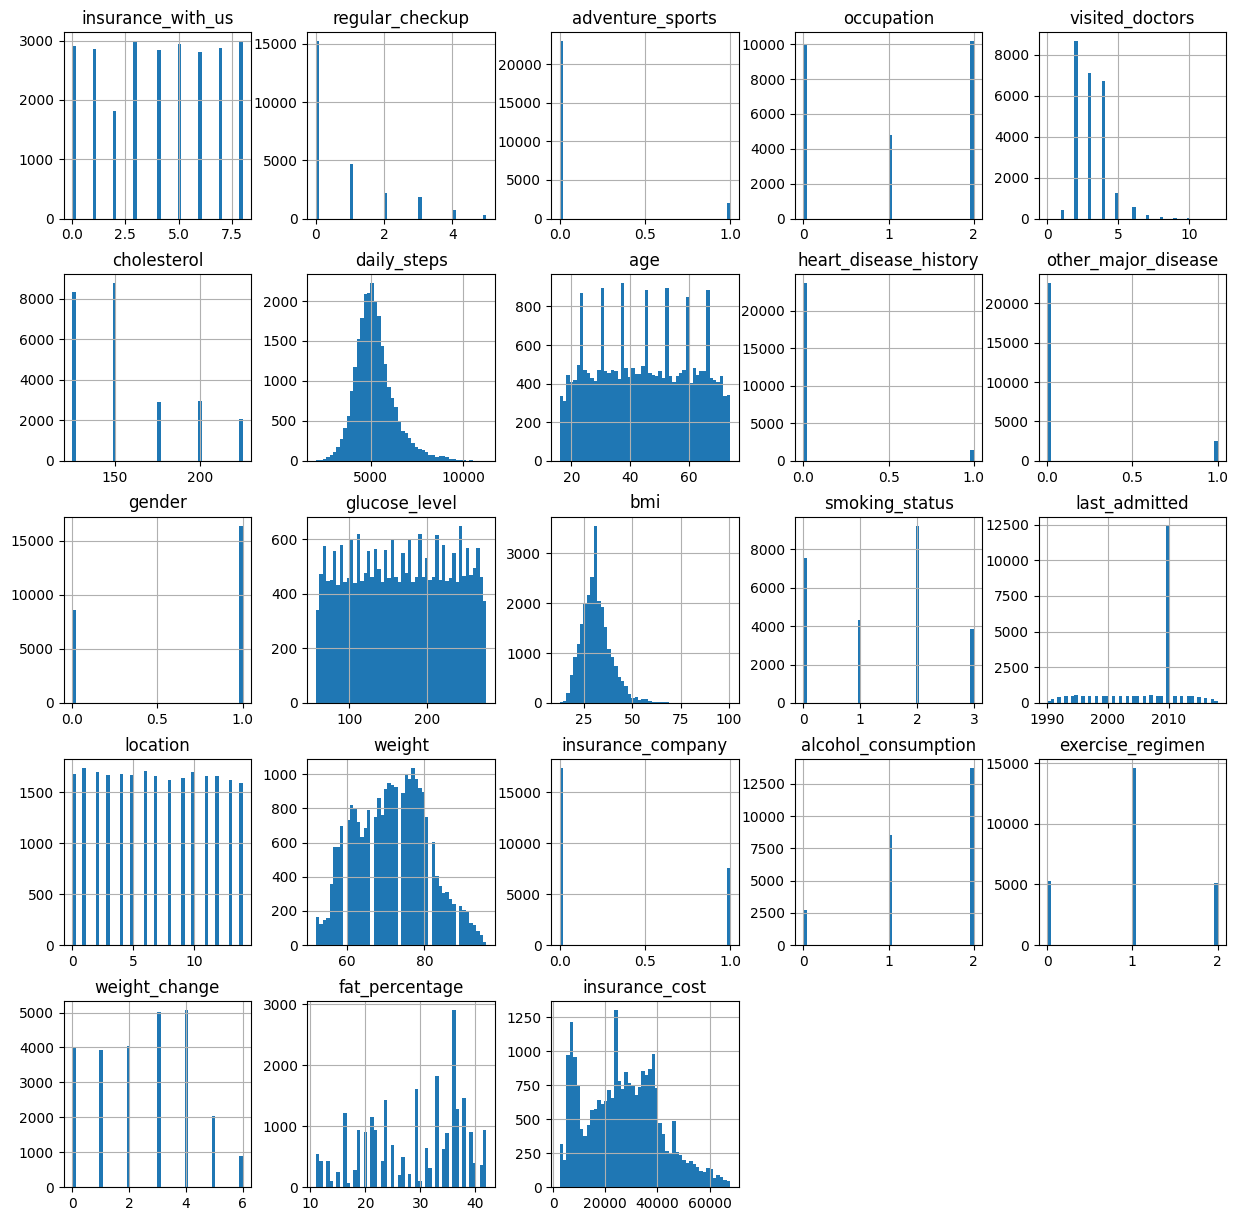

In [70]:
df.hist(bins=50, figsize=(15, 15))
plt.show()

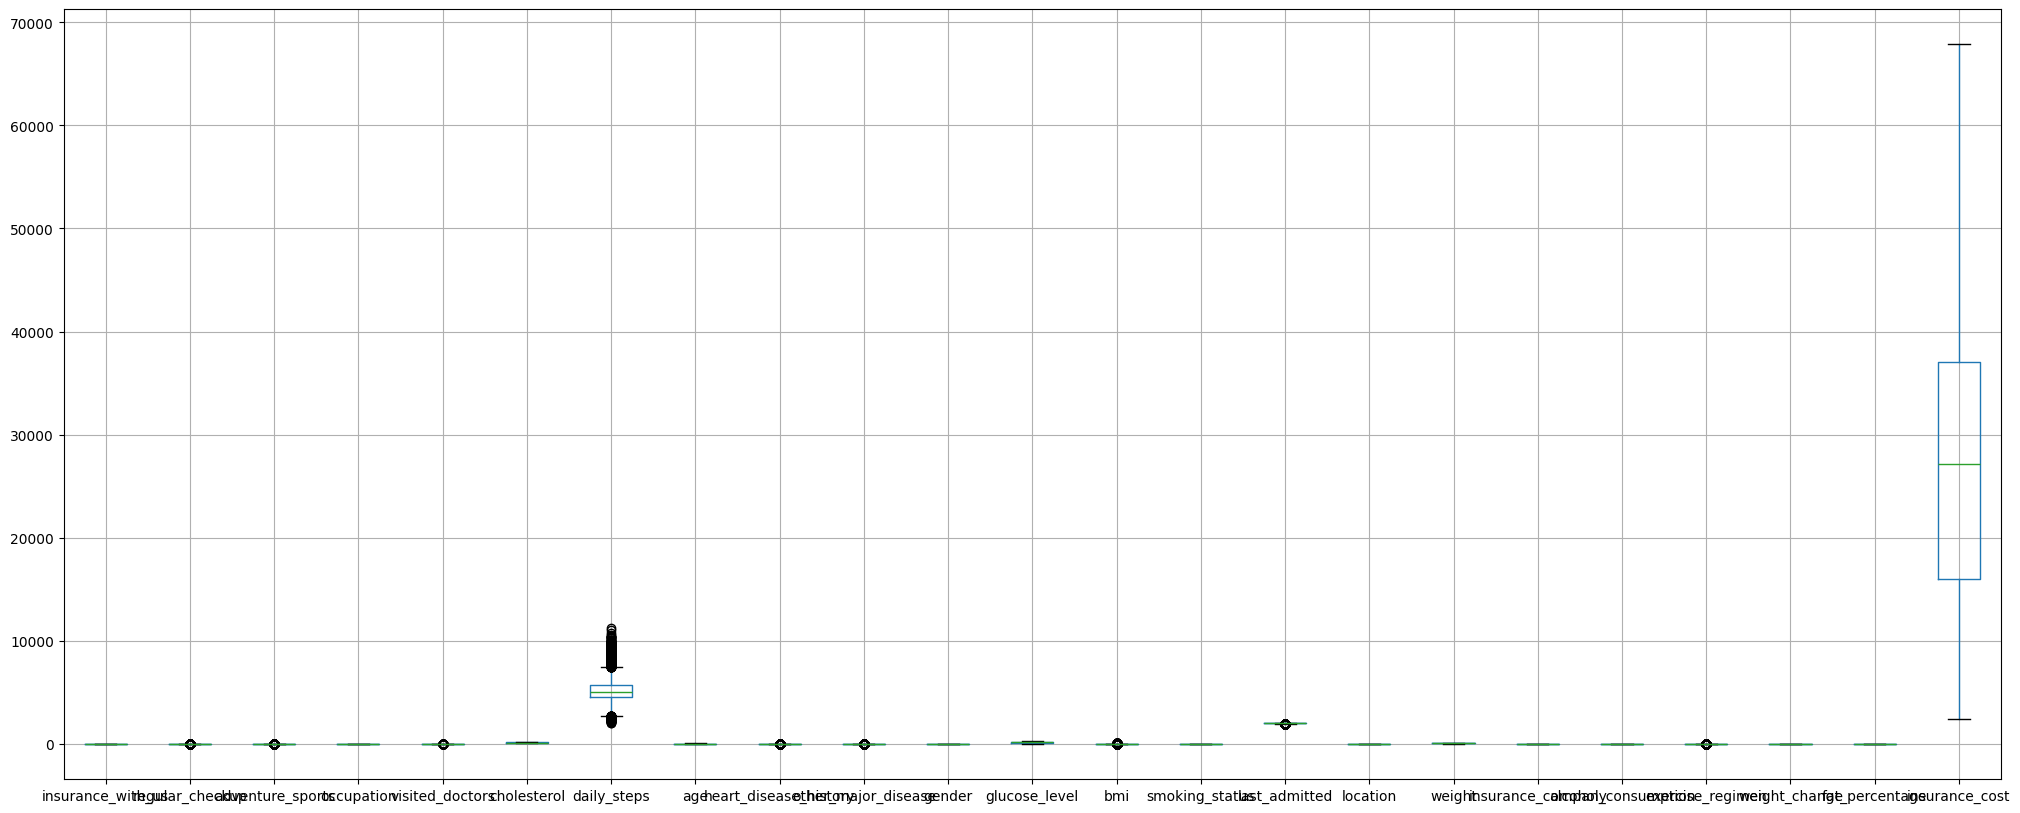

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
df.boxplot()
plt.show()

In [72]:
df.drop(['daily_steps'], axis=1, inplace=True)
df.head(10)

,insurance_with_us,regular_checkup,adventure_sports,occupation,visited_doctors,cholesterol,age,heart_disease_history,other_major_disease,gender,...,smoking_status,last_admitted,location,weight,insurance_company,alcohol_consumption,exercise_regimen,weight_change,fat_percentage,insurance_cost
0,3,1,1,1,2,125,28,1,0,1,...,0,2010.0,3,67,0,2,1,1,25,20978
1,0,0,0,2,4,150,50,0,0,1,...,1,2010.0,6,58,0,2,1,3,27,6170
2,1,0,0,0,4,200,68,0,0,0,...,1,2010.0,6,73,0,0,0,0,32,28382
3,7,4,0,0,2,175,51,0,0,0,...,0,2010.0,3,71,1,2,2,3,37,27148
4,3,1,0,2,2,150,44,0,1,1,...,2,2004.0,1,74,0,1,0,0,34,29616
5,8,0,0,1,2,225,39,0,0,1,...,0,2003.0,2,78,1,2,2,3,13,39488
6,8,0,0,2,4,125,40,0,0,1,...,2,2004.0,5,81,0,1,1,3,16,37020
7,1,0,0,2,4,150,46,0,0,0,...,3,2010.0,3,72,0,2,1,0,34,29616
8,8,1,0,1,4,125,45,0,0,1,...,3,2007.0,11,67,1,2,2,1,12,22212
9,4,3,0,1,3,125,38,0,0,0,...,1,2010.0,12,63,0,0,1,0,12,8638


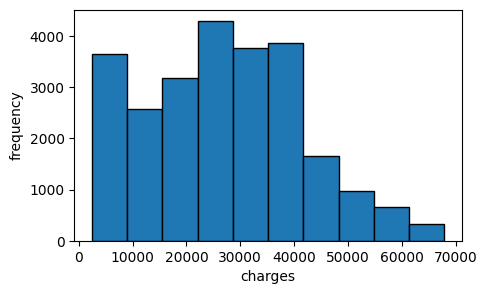

In [79]:
plt.figure(figsize=(5,3))
plt.hist(df['insurance_cost'],bins=10,edgecolor='black')
plt.xlabel('charges')
plt.ylabel('frequency')
plt.show()

In [73]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [74]:
def Learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, )
                                            
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

    plt.title('Learning Curves')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

R²-score: 0.9448117014173475
Mean Absolute Error: 2701.940587999885
Mean Squared Error: 11327733.698601712
Root Mean Squared Error: 3365.669873680678
Mean Absolute Percentage Error: 0.15264499330436615
R² Score: 0.9448117014173475


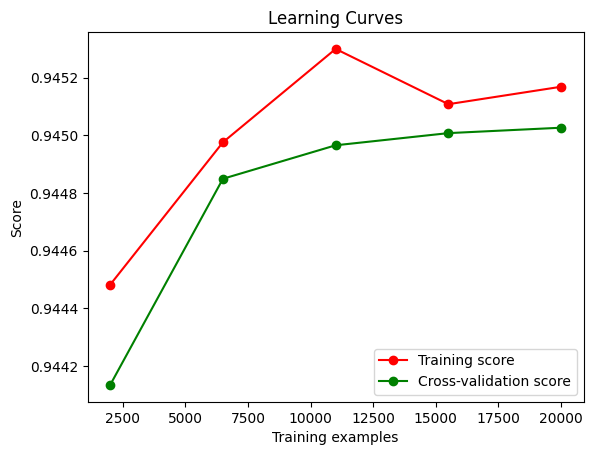

In [75]:
from sklearn import metrics

X = df.drop('insurance_cost',axis=1)
y = df['insurance_cost']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("R²-score:",metrics.r2_score(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
mse =  metrics.mean_squared_error(y_test, y_pred)
rmse =  metrics.mean_squared_error(y_test, y_pred, squared=False)
mape =  metrics.mean_absolute_percentage_error(y_test, y_pred)
r2 =  metrics.r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")
print(f"R² Score: {r2}")
Learning_curve(lr, X, y)

In [76]:
from sklearn.ensemble import RandomForestRegressor

R²-score: 0.9550161195174884


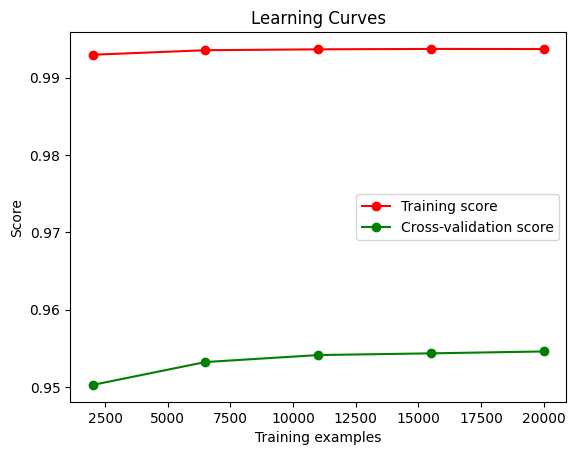

In [77]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("R²-score:",metrics.r2_score(y_test, y_pred))

Learning_curve(rf, X, y)